In [2]:
import tensorflow as tf
import PIL
import PIL.Image
import numpy as np
import os

In [40]:
import pathlib
#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
#archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
#data_dir = pathlib.Path(archive).with_suffix('')

In [41]:
#print(type(data_dir))
#print(data_dir)
x = pathlib.Path(r"C:\Users\shashg\Downloads\character_database")
#print(x)
#print(type(x) == type(data_dir))
data_dir = x
#image_count = len(list(data_dir.glob('*/*.jpg')))

In [46]:
naruto = list(data_dir.glob('Naruto/*'))
batch_size = 8
img_height = 180
img_width = 180

In [47]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 169 files belonging to 2 classes.


Using 136 files for training.


In [48]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 169 files belonging to 2 classes.


Using 33 files for validation.


In [49]:
class_names = train_ds.class_names
print(class_names)

['Light Yagami', 'Naruto']


In [50]:
for x, l in train_ds.take(1):
    print(type(x), type(l))

<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 8 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

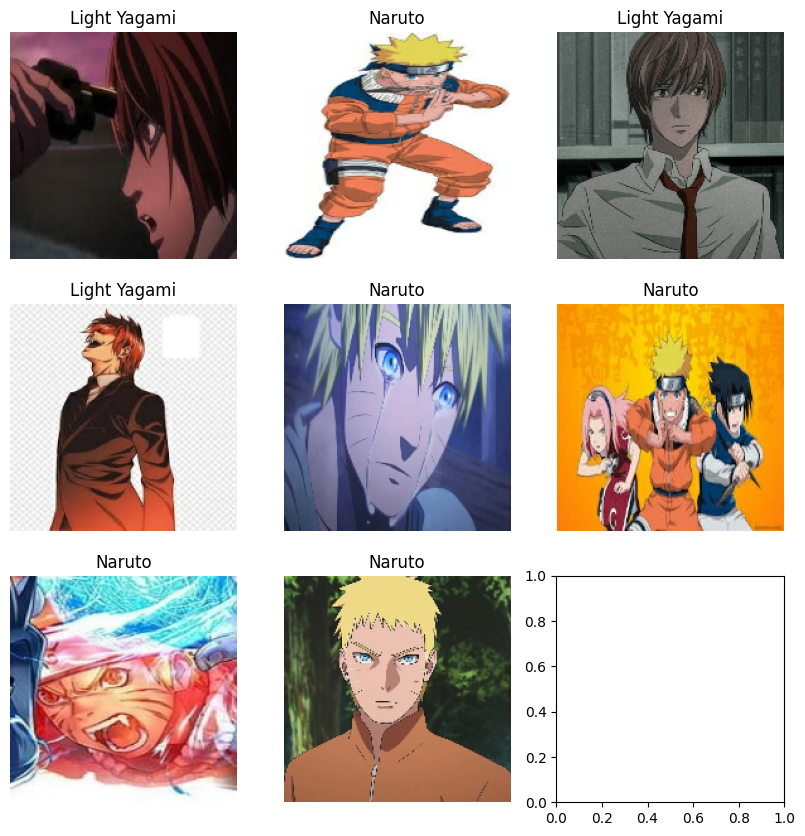

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [52]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [53]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [54]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [55]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [23]:
history = model.fit(train_ds, validation_data=val_ds, epochs=2)

Epoch 1/15


92/92 [==============================] - 82s 884ms/step - loss: 0.2645 - accuracy: 0.9114 - val_loss: 1.2884 - val_accuracy: 0.6144
Epoch 2/15
92/92 [==============================] - 96s 1s/step - loss: 0.1479 - accuracy: 0.9547 - val_loss: 1.7890 - val_accuracy: 0.6035
Epoch 3/15
92/92 [==============================] - 86s 923ms/step - loss: 0.0977 - accuracy: 0.9728 - val_loss: 1.8900 - val_accuracy: 0.6213
Epoch 4/15
92/92 [==============================] - 75s 819ms/step - loss: 0.0600 - accuracy: 0.9809 - val_loss: 2.1796 - val_accuracy: 0.6267
Epoch 5/15
92/92 [==============================] - 75s 810ms/step - loss: 0.0585 - accuracy: 0.9830 - val_loss: 2.2879 - val_accuracy: 0.5831
Epoch 6/15
92/92 [==============================] - 68s 739ms/step - loss: 0.0442 - accuracy: 0.9915 - val_loss: 2.5654 - val_accuracy: 0.5736
Epoch 7/15
92/92 [==============================] - 62s 674ms/step - loss: 0.0367 - accuracy: 0.9888 - val_loss: 2.2784 - val_accuracy: 0.6008
Epoch 8/15
92

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

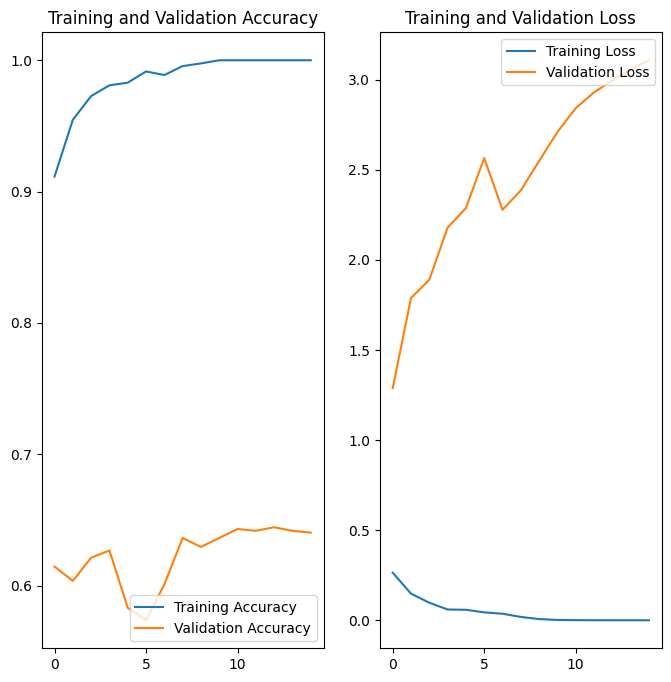

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = 15
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

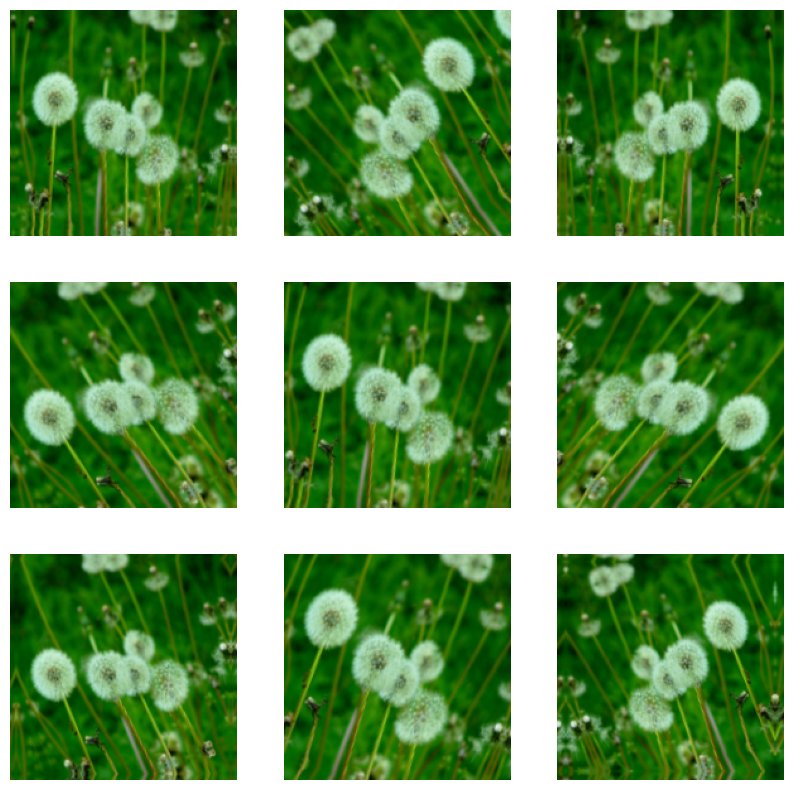

In [29]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
    

In [30]:
model = keras.Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 100s 1s/step - loss: 1.3179 - accuracy: 0.4230 - val_loss: 1.0694 - val_accuracy: 0.5736
Epoch 2/15
92/92 [==============================] - 102s 1s/step - loss: 1.0186 - accuracy: 0.5967 - val_loss: 0.9238 - val_accuracy: 0.6308
Epoch 3/15
92/92 [==============================] - 97s 1s/step - loss: 0.8952 - accuracy: 0.6485 - val_loss: 0.8706 - val_accuracy: 0.6376
Epoch 4/15
92/92 [==============================] - 89s 967ms/step - loss: 0.8388 - accuracy: 0.6771 - val_loss: 0.8229 - val_accuracy: 0.6717
Epoch 5/15
92/92 [==============================] - 88s 958ms/step - loss: 0.7932 - accuracy: 0.6948 - val_loss: 0.7999 - val_accuracy: 0.6839
Epoch 6/15
92/92 [==============================] - 92s 1s/step - loss: 0.7733 - accuracy: 0.7101 - val_loss: 0.7872 - val_accuracy: 0.6798
Epoch 7/15
92/92 [==============================] - 82s 889ms/step - loss: 0.7188 - accuracy: 0.7302 - val_loss: 0.7977 - val_accuracy: 0.6839
Epoch 8/1

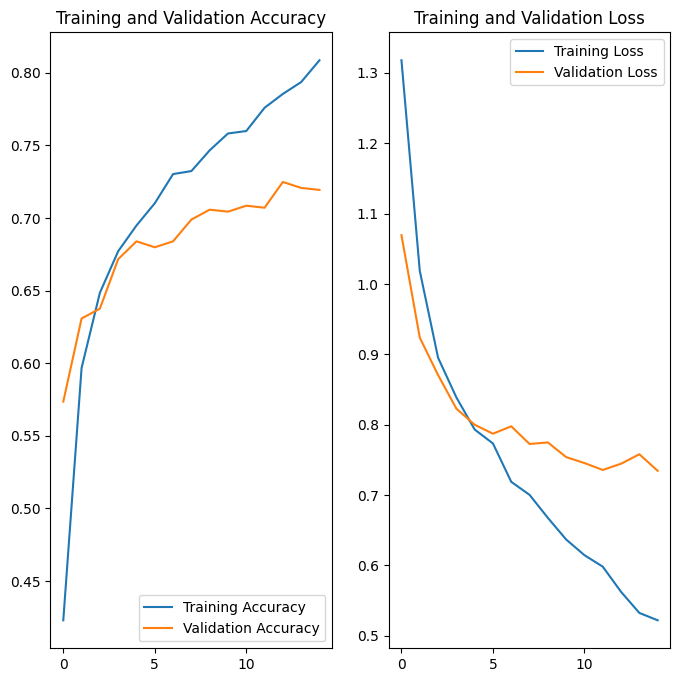

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = 15
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [36]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    r"C:\Users\shashg\Downloads\sunflower-with-red-and-yellow-tulips-garry-gay.jpg", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 39ms/step
This image most likely belongs to sunflowers with a 42.93 percent confidence.
